In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

48

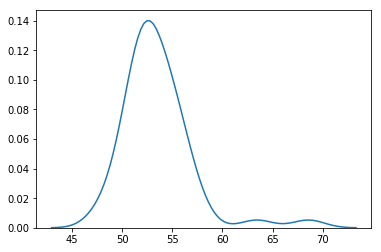

In [29]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45,
52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33,
57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99,
52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84,
53.16])
sns.kdeplot(data)
len(data)

(array([0.02996165, 0.02996165, 0.02996165, 0.08988495, 0.0599233 ,
        0.20973154, 0.20973154, 0.17976989, 0.1198466 , 0.08988495,
        0.1198466 , 0.0599233 , 0.08988495, 0.02996165, 0.02996165,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02996165, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02996165]),
 array([47.72      , 48.41533333, 49.11066667, 49.806     , 50.50133333,
        51.19666667, 51.892     , 52.58733333, 53.28266667, 53.978     ,
        54.67333333, 55.36866667, 56.064     , 56.75933333, 57.45466667,
        58.15      , 58.84533333, 59.54066667, 60.236     , 60.93133333,
        61.62666667, 62.322     , 63.01733333, 63.71266667, 64.408     ,
        65.10333333, 65.79866667, 66.494     , 67.18933333, 67.88466667,
        68.58      ]),
 <a list of 30 Patch objects>)

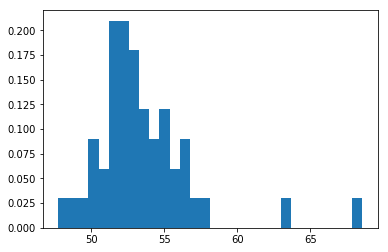

In [6]:
plt.hist(data,30,density=1)

In [7]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 3200/3200 [00:01<00:00, 2122.52draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b62aa94e0>,
      dtype=object)

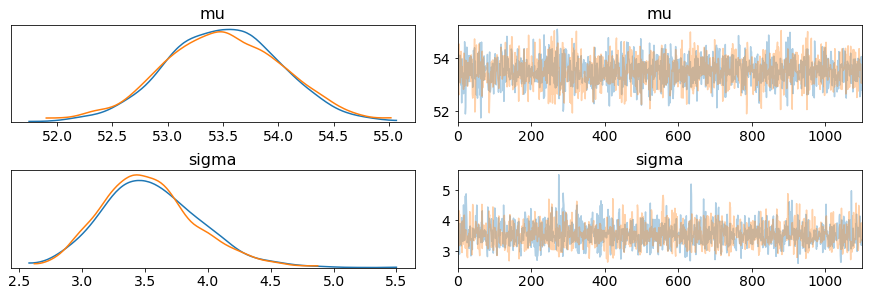

In [10]:
pm.traceplot(trace_g)

In [11]:
pm.summary(trace_g)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.491388,0.528594,0.010411,52.521589,54.604219,2365.992061,0.999570
sigma,3.541131,0.382729,0.008085,2.833814,4.291755,1969.716383,1.000831


100%|██████████| 200/200 [00:00<00:00, 1067.88it/s]


Text(0.5, 0, '$x$')

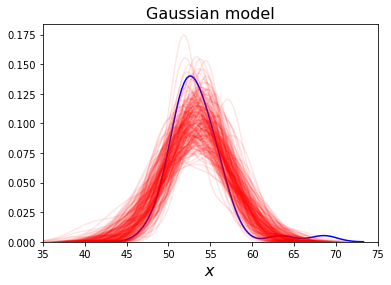

In [45]:
y_pred = pm.sample_posterior_predictive(trace_g, 200, model_g, size=1)
sns.kdeplot(data, color='b')
for i in y_pred['y']:
    sns.kdeplot(i, color='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$x$', fontsize=16)

In [64]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(10000))

1.7757732164225617

In [77]:
np.mean(stats.norm(loc=0, scale=1).rvs(10000))

0.01097121034406965

(-7, 7)

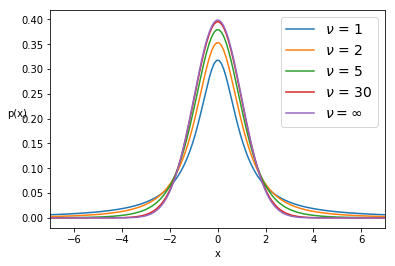

In [78]:
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=r'$\nu$ = {}'.format(df))
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu = \infty$')
plt.xlabel('x')
plt.ylabel('p(x)', rotation=0)
plt.legend(loc=0, fontsize=14)
plt.xlim(-7, 7)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, mu]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1387.34draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b54c31cc0>,
      dtype=object)

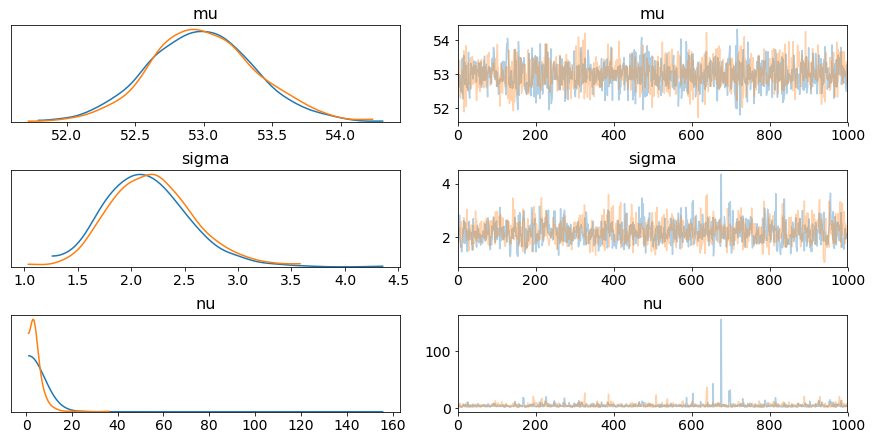

In [81]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1000)
pm.traceplot(trace_t)


In [82]:
pm.summary(trace_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,52.991297,0.380637,0.009349,52.272690,53.777968,1502.156069,1.000633
sigma,2.179920,0.394277,0.012182,1.440264,2.974143,1018.212058,1.003477
nu,4.586345,4.662930,0.133600,1.250853,9.822653,1173.640431,1.000006
